In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
import seaborn as sns

In [4]:
%load_ext autoreload
%autoreload 2

import spp
import solveDP
import lf

## 1 Social planners problem
### Exercise 1

If there is no technological development nothing happens, and as costs is already as low as possible in the period, the investment does not change anything such that the state is still $s_{s}= \left(c_1,c_1\right)$

Techonological development will move into $s_{2}= \left(c_1,c_2\right)$, the investment still does do anything to change the marginal cost of the firm

From $s_{2}= \left(c_1,c_2\right)$ with investment and no techonological change we move into $s_{3}= \left(c_2,c_2\right)$

From $s_{2}= \left(c_1,c_2\right)$ with investment and techonological change we move into $s_{3}= \left(c_2,c_3\right)$


## 2 State recursion algorithm
### Exercise 2

$$
u(s,a)=p-x-K(c)a
$$

$$
x'=x(1-a)+ca
$$
$$
V(s):= \underset{a\in{0,1}}{\max} \left\{ u\left(s,a\right)+β \mathbb{E}\left[V(s')|s,a \right] \right\}
$$
$$
v_{I}(s):=  u\left(s,1\right)+β \mathbb{E}\left[V(s')|s,a=1\right]
$$
$$
v_{N}(s):=  u\left(s,0\right)+β \mathbb{E}\left[V(s')|s,a=0\right]
$$

__step 2.1__


For layer 4 there is no uncertanty such that $V(s_7)-V(s_{10})$ is known:

$$
V(c_4,c_4) = ∑^{\infty}_{t=0}β^t u(s_4 ,0)=∑^{\infty}_{t=0}β^t \left(p-c_4 \right)
$$

$$
V(c_i-c_i,c_4) = \max\left\{p-c_i -K(c_4)+ ∑^{\infty}_{t=1}β^t \left(p-c_4 \right) ,∑^{\infty}_{t=0}β^t \left(p-c_i \right)\right\}
$$
for $i\in\{ 1,2,3\}$


in layer 3 $V$ is then a propablity weighted average of the choice in layer 3 and the dependent state, given transition to layer 4.

With layer 3 mapped out, layer 2, and 1 can thereafter be found.

__step 2.2__

the value of investing will be the value in the current period (profits minus investment costs) + propablity weighted sum of value in the next period where the possibe states are no technoogical progress such that costs are lowest possible, and technological progress

$$
v_I(x,c) = p-x-K(c) +\beta\left[ π V(c,\tilde{c})+(1-π) V(c,c) \right]
$$

As argued above $V(c,\tilde{c})$ and $V(c,c)$ can be known by backwards induction

__step 2.3__


$$
v_N(x,c) = p-x +\beta\left[ π V(x,\tilde{c})+(1-π) V(x,c) \right]
$$

Given $V(x,c)=V_N(x,c) we have: 
$$
v_N(x,c) = p-x +\beta\left[ π V(x,\tilde{c})+(1-π) v_N(x,c) \right]
$$
and we can isolate $v_N(x,c)$:

$$
(1-β(1-π)) v_N(x,c) = p-x +\beta\left[ π V(x,\tilde{c}) \right]
$$
$$
⇔ v_N(x,c) = \frac{p-x +\beta π V(x,\tilde{c})}{(1-β(1-π)) }
$$

__step 2.4__


If $v_I(x,c)>v_n(x,c)$, then $V(x,c)=v_I(x,c)$. Giving eq 14:
$$
v_N(x,c) = p-x +\beta\left[ π V(x,\tilde{c})+(1-π)v_I(x,c)\right]
$$

Again due to $v_I(x,c)>v_n(x,c)$ we must have:
$$
v_N(x,c) > p-x +\beta\left[ π V(x,\tilde{c})+(1-π)v_N(x,c)\right]
$$

We can use the same derrivation as in step 2.3 to show: 
$$
⇔ v_N(x,c) > \frac{p-x +\beta π V(x,\tilde{c})}{(1-β(1-π)) }
$$

__code 2.4__

In [38]:
ssp_dict = {'k1':8.3,
        'N':4,
        'beta':0.99,
        'pf':1,
        'maxc':5,
        'p'   :5,
        }

In [39]:
mp = spp.Ssp_model(ssp_dict)
V_save, P_save = mp.state_recursion()

In [40]:
V_save

array([[473.59895753, 478.38278538, 482.0205    , 486.7       ],
       [         nan, 481.96483667, 485.14966667, 488.36666667],
       [         nan,          nan, 488.46633333, 490.03333333],
       [         nan,          nan,          nan, 500.        ]])

In [41]:
I = np.triu_indices_from(V_save)
V_save[I]

array([473.59895753, 478.38278538, 482.0205    , 486.7       ,
       481.96483667, 485.14966667, 488.36666667, 488.46633333,
       490.03333333, 500.        ])

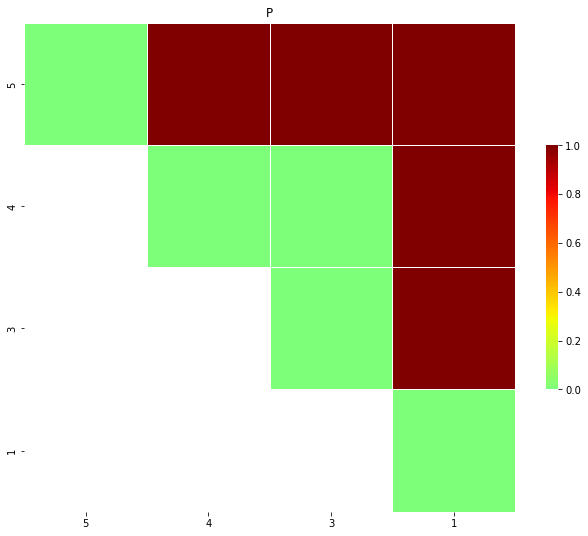

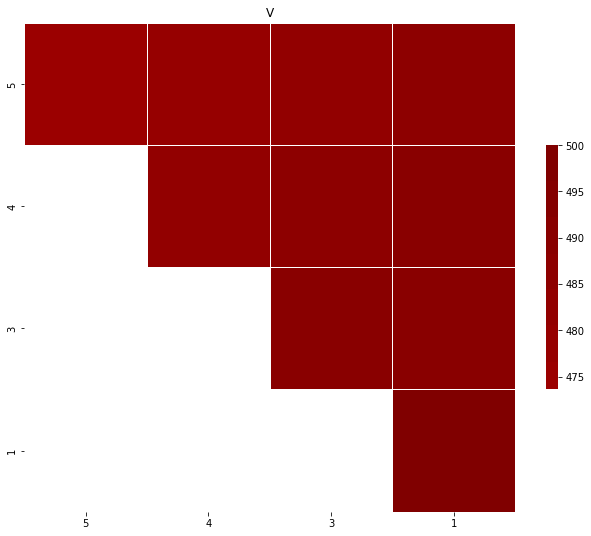

In [42]:
mp.plot_solution()

__code 2.6__

In [43]:
grid = np.linspace(5,0,10)
beta =0.99
f = lambda x,c : beta/(1-beta) *(x-c)
f_best = -np.inf
xc_best = [0,0]

for x in grid:
    for c in grid:
        f_cur = f(x,c)
        if f_cur>f_best:
            f_best =f_cur
            xc_best = [x,c]

ystar = f_best
print(f'Maximized at {f_best} with x = {xc_best[0]:.3f} and c = {xc_best[1]:.3f}')

Maximized at 494.99999999999955 with x = 5.000 and c = 0.000


In [49]:
ssp_dict = {'k1':ystar,
        'N':10,
        'beta':0.99,
        'pf':1,
        'maxc':5,
        'p'   :5,
        'Kform' : 'constant'
        }
mp = spp.Ssp_model(ssp_dict)
V, P = mp.state_recursion()

In [50]:
P

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.]])

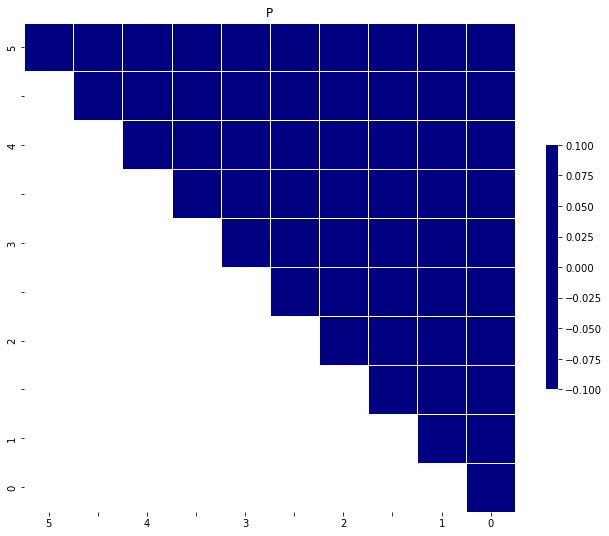

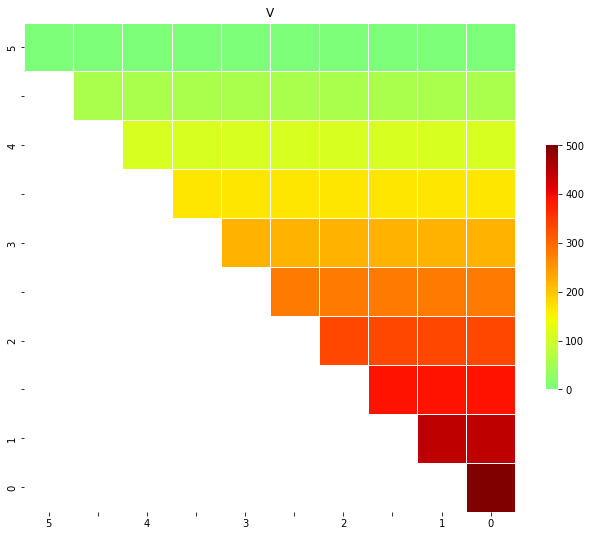

In [51]:
mp.plot_solution()

There is no investment since investment costs is equal to infinite profits with a price of 5 and production cost of 0 (value function with state $s_{10}$) but when investing the soical planner incurs the cost in the current period and then receives the good profits in the next, because of discounting this is never optimal, even in $s_{7}$ which is the state most advantagous for investing as you go from production costs of 5 to 0. 

In [46]:
ssp_dict = {'k1':ystar,
        'N':10,
        'beta':0.99,
        'pf':1,
        'maxc':5,
        'p'   :5,
        'Kform' : 'smooth'
        }
mp = spp.Ssp_model(ssp_dict)
V, P = mp.state_recursion()

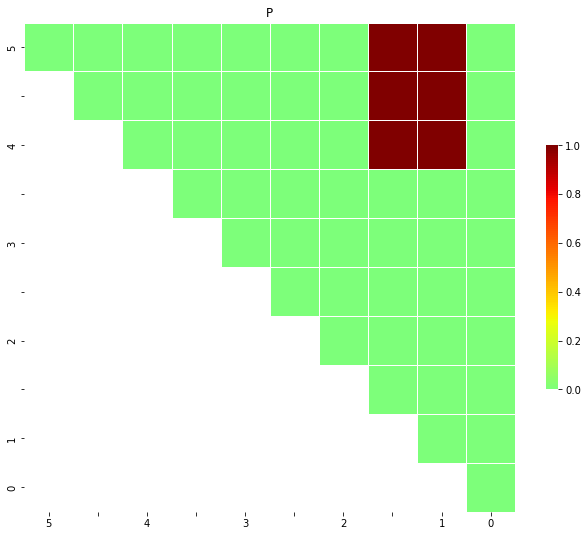

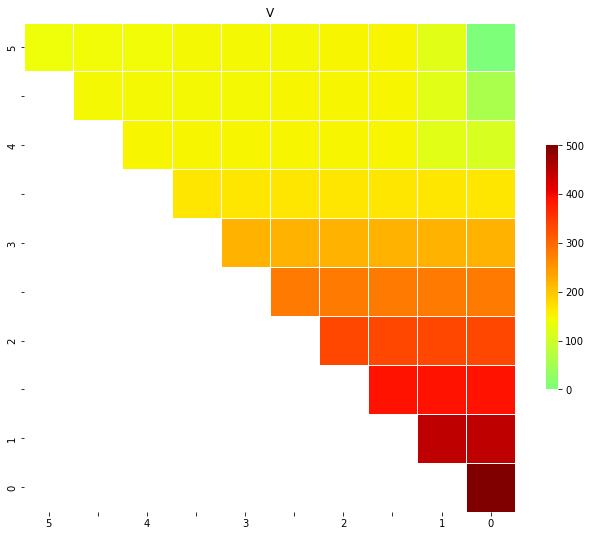

In [47]:
mp.plot_solution()

Now with $K(c) = \frac{k1}{1+c}$ we have investment, as the costs are decreasing with higher c, so it can be optimal to invest.

it is however still never optimal to invest in layer 4 when $c=0$ as we come back to the case $K=k1$

## 3 The leapfrogging game

### Exercise 4

In [237]:
self = lf.Lf_model()


### Exercise 6


In [242]:
self.solve_last_corner()
self.solve_last_edge()
self.solve_last_interior()

In [243]:
self.ss[3].nEQ

array([[3, 3, 3, 1],
       [3, 3, 3, 1],
       [3, 3, 3, 1],
       [1, 1, 1, 1]])

In [244]:
self.print_eq()


P1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

vN1:
[[  0.           0.           0.           0.        ]
 [  1.66666667   0.           0.           0.        ]
 [  3.33333333   1.66666667   0.           0.        ]
 [102.52083247  68.34722164  34.17361082   0.        ]]

vI1:
[[-8.3        -8.3        -8.3        -8.3       ]
 [-6.63333333 -8.3        -8.3        -8.3       ]
 [-4.96666667 -6.63333333 -8.3        -8.3       ]
 [94.22083247 60.04722164 25.87361082 -8.3       ]]

P2:
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]

vN2:
[[ 84.86948112  88.12153016  91.3735792  102.52083247]
 [ 53.94791934  53.94791934  57.19996838  68.34722164]
 [ 23.02635756  23.02635756  23.02635756  34.17361082]
 [  0.           0.           0.           0.        ]]

vI2:
[[89.22083247 90.88749913 92.5541658  94.22083247]
 [56.71388831 56.71388831 58.38055498 60.04722164]
 [24.20694416 24.20694416 24.20694416 25.87361082]
 [-8.3        -8.3        -8.3        -8.3  

In [247]:
self.print_eq(n_eq=2)


P1:
[[ 1.  1.  1. nan]
 [ 1.  1.  1. nan]
 [ 1.  1.  1. nan]
 [nan nan nan nan]]

vN1:
[[84.86948112 53.94791934 23.02635756         nan]
 [88.12153016 53.94791934 23.02635756         nan]
 [91.3735792  57.19996838 23.02635756         nan]
 [        nan         nan         nan         nan]]

vI1:
[[89.22083247 56.71388831 24.20694416         nan]
 [90.88749913 56.71388831 24.20694416         nan]
 [92.5541658  58.38055498 24.20694416         nan]
 [        nan         nan         nan         nan]]

P2:
[[ 0.  0.  0. nan]
 [ 0.  0.  0. nan]
 [ 0.  0.  0. nan]
 [nan nan nan nan]]

vN2:
[[0.         1.66666667 3.33333333        nan]
 [0.         0.         1.66666667        nan]
 [0.         0.         0.                nan]
 [       nan        nan        nan        nan]]

vI2:
[[-8.3        -6.63333333 -4.96666667         nan]
 [-8.3        -8.3        -6.63333333         nan]
 [-8.3        -8.3        -8.3                nan]
 [        nan         nan         nan         nan]]


In [85]:
self.ss[3].EQs[0,:,:]

array([[None, None, None,
        namespace(P1=array([False]), P2=array([False]), vI1=-8.3, vI2=array([94.22083247]), vN1=array([0.]), vN2=array([102.52083247]))],
       [None, None, None,
        namespace(P1=array([False]), P2=array([False]), vI1=-8.3, vI2=array([60.04722164]), vN1=array([0.]), vN2=array([68.34722164]))],
       [None, None, None, None],
       [namespace(P1=array([False]), P2=array([False]), vI1=-8.3, vI2=array([-8.3]), vN1=array([102.52083247]), vN2=array([0.])),
        namespace(P1=array([False]), P2=array([False]), vI1=-8.3, vI2=array([-8.3]), vN1=array([68.34722164]), vN2=array([0.])),
        None,
        namespace(P1=False, P2=False, vI1=-8.3, vI2=-8.3, vN1=0.0, vN2=0.0)]],
      dtype=object)

### Exercise 6